# Aprendizagem de maquinas

Bloco de notas utilizado ao longo da disciplina que servirá de trabalho para a aprovação.

## Regressão linear Simples

O objetivo é ver a relação entre a bolsa de valores (Ibovespa) e o Dolar.

### Importação dos dados

Para importar os dados, utilizaremos a biblioteca do *Yahoo Finances* para podemos pegar os dados. 
Iremos pegar as cotações:

* Do Ibovespa;
* Dolar em relação ao Real;

In [14]:
import yfinance as yf

ibov = yf.Ticker('^BVSP')
dolar = yf.Ticker('USDBRL=X')

In [15]:
ibov_hist = ibov.history(period='max')
display('Serie historica do Ibovespa')
ibov_hist

'Serie historica do Ibovespa'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-04-27 00:00:00-03:00,24.799999,25.400000,24.500000,24.500000,0,0.0,0.0
1993-04-28 00:00:00-03:00,24.500000,24.600000,23.700001,24.299999,0,0.0,0.0
1993-04-29 00:00:00-03:00,24.299999,24.799999,23.700001,23.700001,0,0.0,0.0
1993-04-30 00:00:00-03:00,23.700001,24.200001,23.700001,24.100000,0,0.0,0.0
1993-05-03 00:00:00-03:00,24.100000,24.400000,23.799999,24.100000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-02 00:00:00-03:00,116565.000000,116672.000000,114761.000000,115057.000000,8524900,0.0,0.0
2023-10-03 00:00:00-03:00,115055.000000,115056.000000,113151.000000,113419.000000,11104800,0.0,0.0
2023-10-04 00:00:00-03:00,113430.000000,114075.000000,113036.000000,113607.000000,10813800,0.0,0.0


In [16]:
dolar_hist = dolar.history(period='max')
display('Serie historica do Dolar (em valor de Real)')
dolar_hist

'Serie historica do Dolar (em valor de Real)'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,2.9460,2.9460,2.923000,2.9230,0,0.0,0.0
2003-12-02 00:00:00+00:00,2.9230,2.9310,2.923000,2.9310,0,0.0,0.0
2003-12-03 00:00:00+00:00,2.9310,2.9360,2.926000,2.9310,0,0.0,0.0
2003-12-04 00:00:00+00:00,2.9310,2.9430,2.931000,2.9430,0,0.0,0.0
2003-12-05 00:00:00+00:00,2.9430,2.9480,2.934000,2.9340,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-03 00:00:00+01:00,5.0615,5.1346,5.059925,5.0615,0,0.0,0.0
2023-10-04 00:00:00+01:00,5.1663,5.1759,5.122887,5.1663,0,0.0,0.0
2023-10-05 00:00:00+01:00,5.1546,5.1849,5.135422,5.1546,0,0.0,0.0


Primeiramente, iremos ver graficamente os dados dos indices, relacionando a data, com o valor de fechamento.

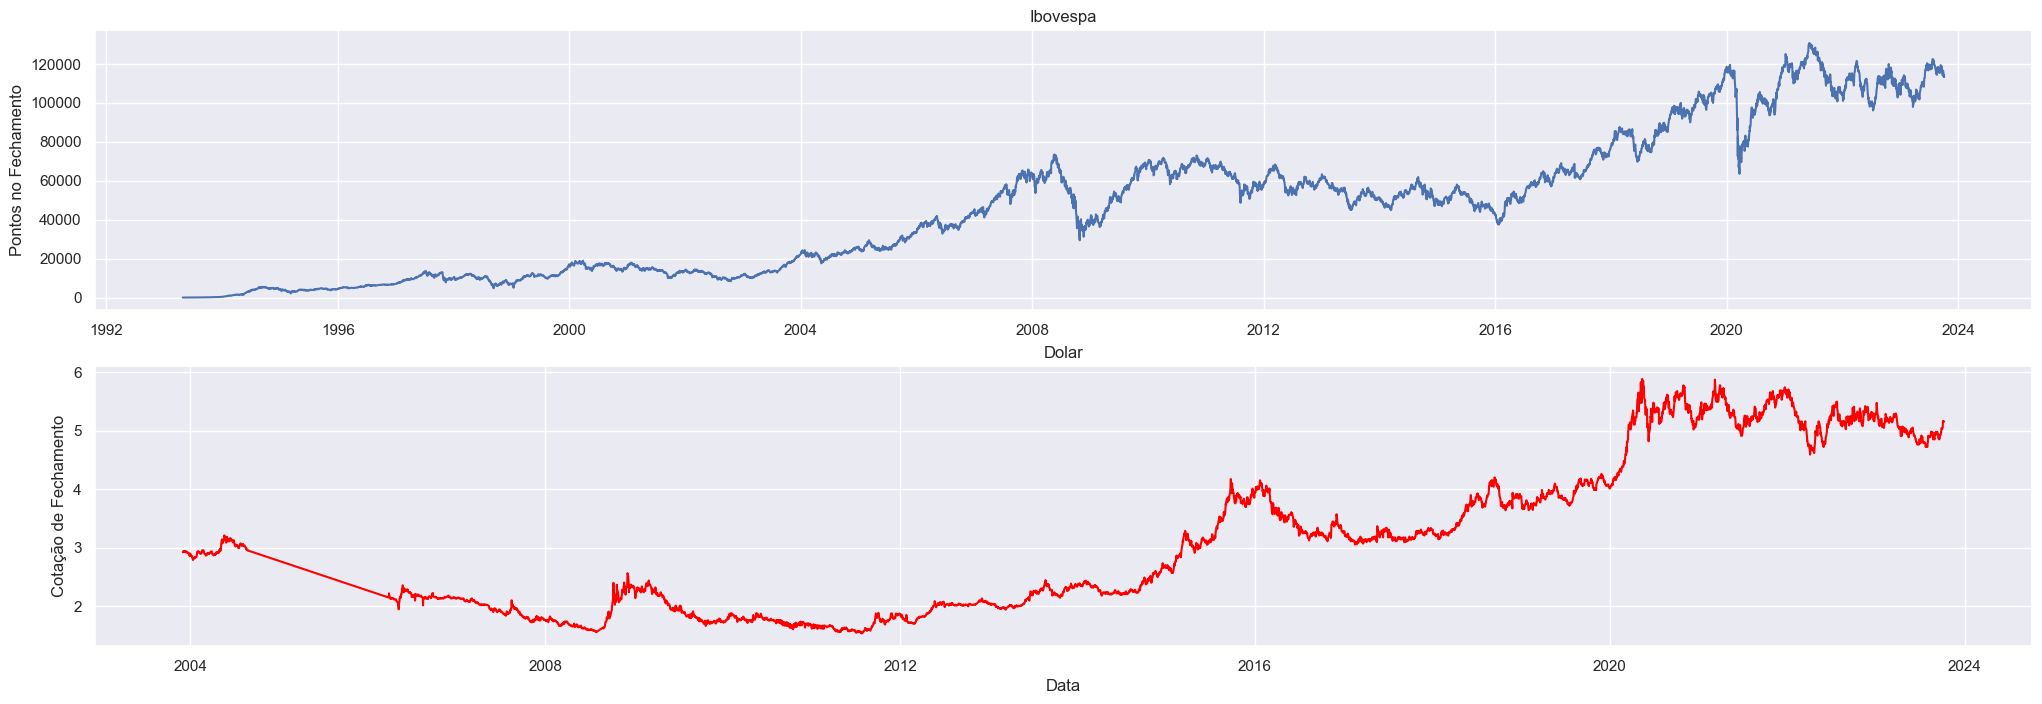

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(25, 15))
plt.subplot(2, 1, 1)
plt.title('Ibovespa')
plt.xlabel('Data')
plt.ylabel('Pontos no Fechamento')
plt.plot(ibov_hist['Close'], label='IBOV')

plt.subplot(2, 1, 2)
plt.title('Dolar')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(dolar_hist['Close'], color='red')

plt.show()

### Tratamento dos dados

Nesse passo, iremos fazer uma união dos dados, visando tirar linhas que não tenham todos os valores e garantir que estejam com a mesma data (uma unica referencia).

In [37]:
import pandas as pd

dolar_hist = dolar.history(period='max')
ibov_hist = ibov.history(period='max')

ibov_hist.index = ibov_hist.index.strftime('%Y-%m-%d')
ibov_hist = ibov_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
dolar_hist.index = dolar_hist.index.strftime('%Y-%m-%d')
dolar_hist = dolar_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

df_ibov_dolar = pd.merge(ibov_hist, dolar_hist, left_index=True, right_index=True)
df_ibov_dolar.columns =['IBOV', 'DOLAR']

df_ibov_dolar

,IBOV,DOLAR
Date,,
2003-12-01,20521.0,2.9230
2003-12-02,20458.0,2.9310
2003-12-03,20540.0,2.9310
2003-12-04,20414.0,2.9430
2003-12-05,20880.0,2.9340
...,...,...
2023-10-02,115057.0,5.0428
2023-10-03,113419.0,5.0615
2023-10-04,113607.0,5.1663


### Correlação entre os dados

Iremos agora, avaliar a correlação dos dados, no caso o fechamento do dolar e do ibovespa. Para isso, num primeiro momento vamos criar um **"mapa de calor"**.

<Axes: >

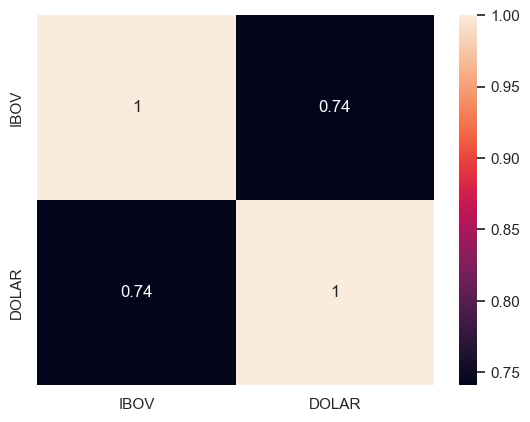

In [19]:
sns.heatmap(df_ibov_dolar.corr(), annot=True)

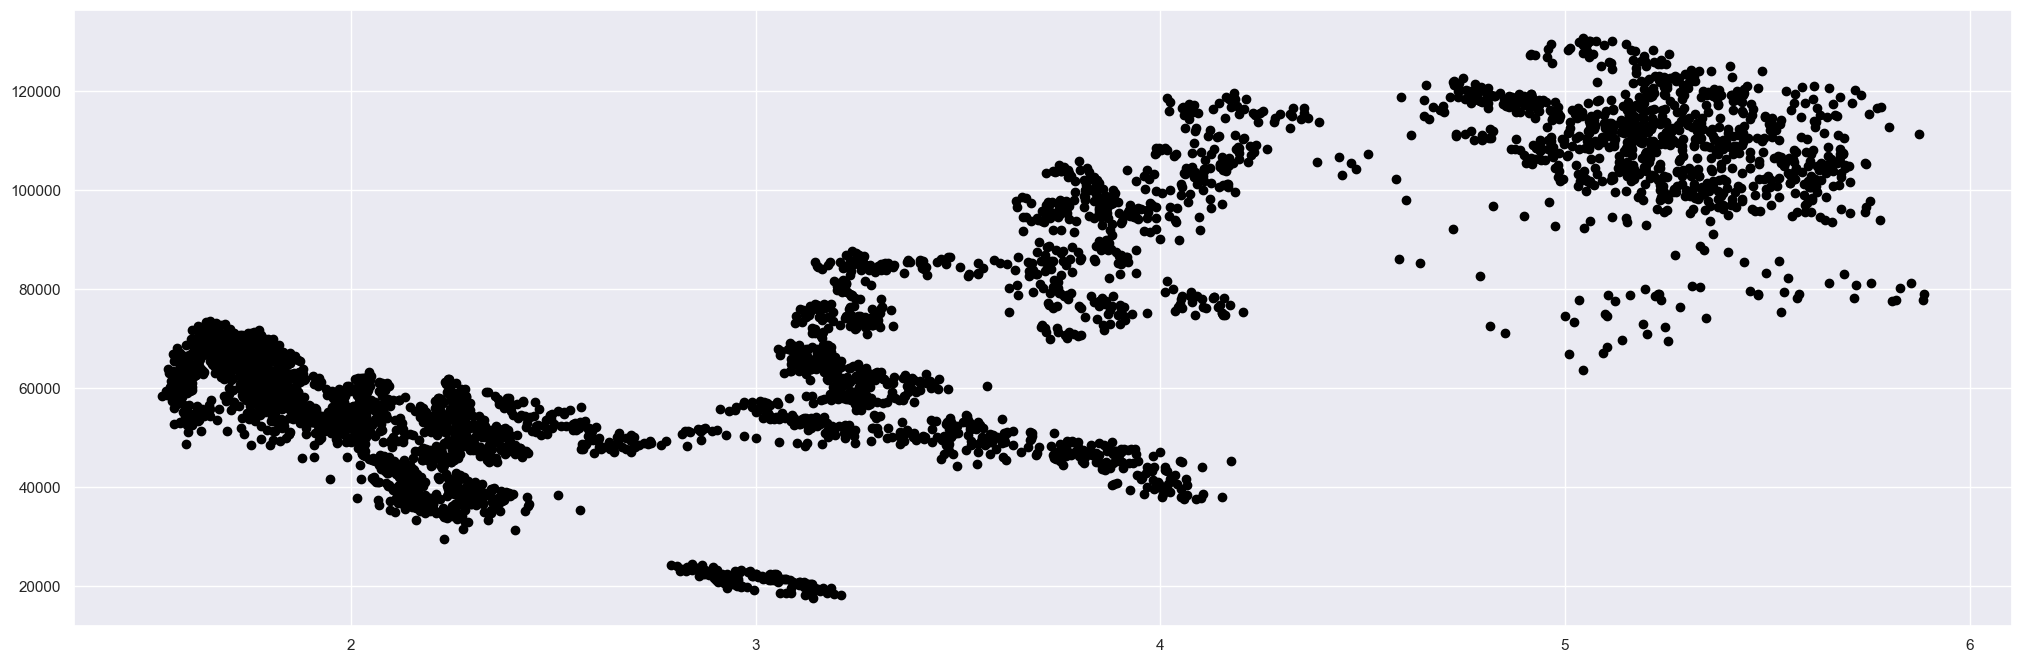

In [20]:
plt.figure(figsize=(25, 8))
plt.plot(df_ibov_dolar['DOLAR'], df_ibov_dolar['IBOV'],'o', color='black')

Para facilitar a visualização, será feita janelas de visualização de um ano. 


<Axes: xlabel='Date'>

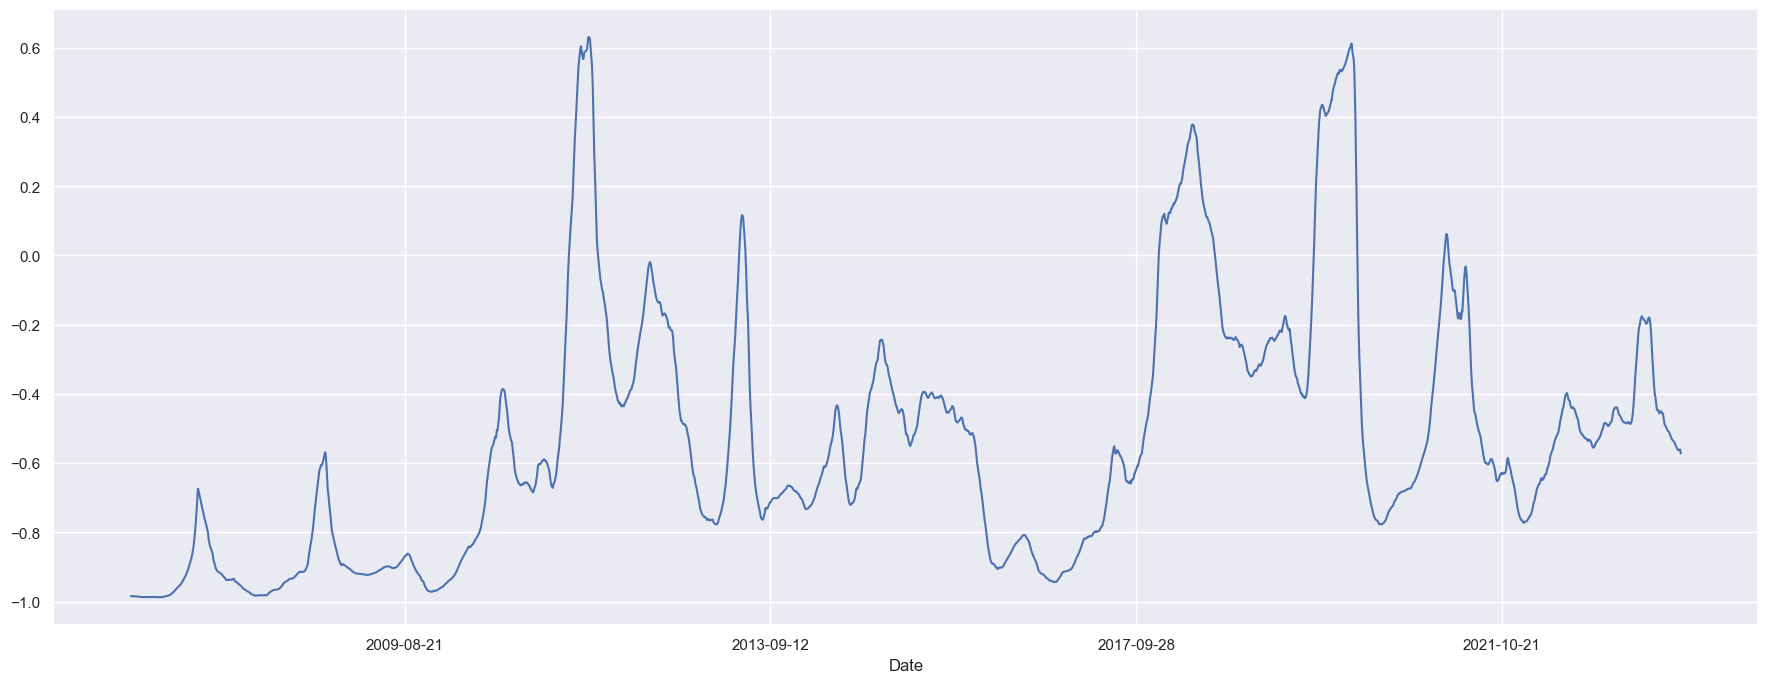

In [21]:
df_ibov_dolar['DOLAR'].rolling(252).corr(df_ibov_dolar['IBOV']).plot(figsize=(22,8))

De Maneira geral, o que vemos é que existe momentos que se tem alta correlação positiva e vales com alta correlação negativa. Lembrando que o ponto onde indica onde não existe correlação é o entorno do zero.

### Aplicando a Regressão Linear ao dados

Iremos dividir em dois momentos, no primeiro usaremos o *dataframe* todo e num segundo momento apenas uma janela. Para isso vamos usar a ferramenta do [*Scikit-learn*](https://scikit-learn.org/stable/).

#### Regressão Linear de todo o DataFrame

Como já temos os dados e base, basta:
* Separar os dados de treinamento;
* Dados de validação;
* Aplicar o metodo;
* Validar saida;

In [22]:
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def reg_linear(vet_indept, vet_dept):
    x_train , x_test , y_train , y_test = train_test_split(vet_indept, vet_dept, test_size=0.20, random_state=42)

    regr = linear_model.LinearRegression()

    regr.fit(x_train, y_train)

    y_pred =regr.predict(x_train)

    mean_squat_error = mean_squared_error(y_train, y_pred)
    coff_of_det = r2_score(y_train, y_pred)

    y_pred_test =regr.predict(x_test) 

    mean_squat_error_test = mean_squared_error(y_test, y_pred_test)
    coff_of_det_test = r2_score(y_test, y_pred_test)

    coeff = regr.coef_
    intercept = regr.intercept_

    #Plot outputs
    plt.figure(figsize=(25, 15))
    plt.subplot(2, 1, 1)
    plt.title('Treinamento')
    plt.ylabel('Pontos no Fechamento')
    plt.xlabel('Valor do dolar')
    plt.scatter(x_train, y_train, color="black")
    plt.plot(x_train, y_pred, color="blue", linewidth=3)

    plt.subplot(2, 1, 2)
    plt.title('Validação')
    plt.ylabel('Pontos no Fechamento')
    plt.xlabel('Valor do dolar')
    plt.scatter(x_test, y_test, color="black")
    plt.plot(x_train, y_pred, color="red", linewidth=3)

    plt.show()
    dict_train = {'mean_squat_error': mean_squat_error, 'coff_of_det': coff_of_det}
    dict_test = {'mean_squat_error': mean_squat_error_test, 'coff_of_det': coff_of_det_test}
    dict_coff = {"coeff": coeff, "intercept": intercept}

    return dict([('Treinamento', dict_train), ('Validacao', dict_test), ('Coeficiente', dict_coff)])

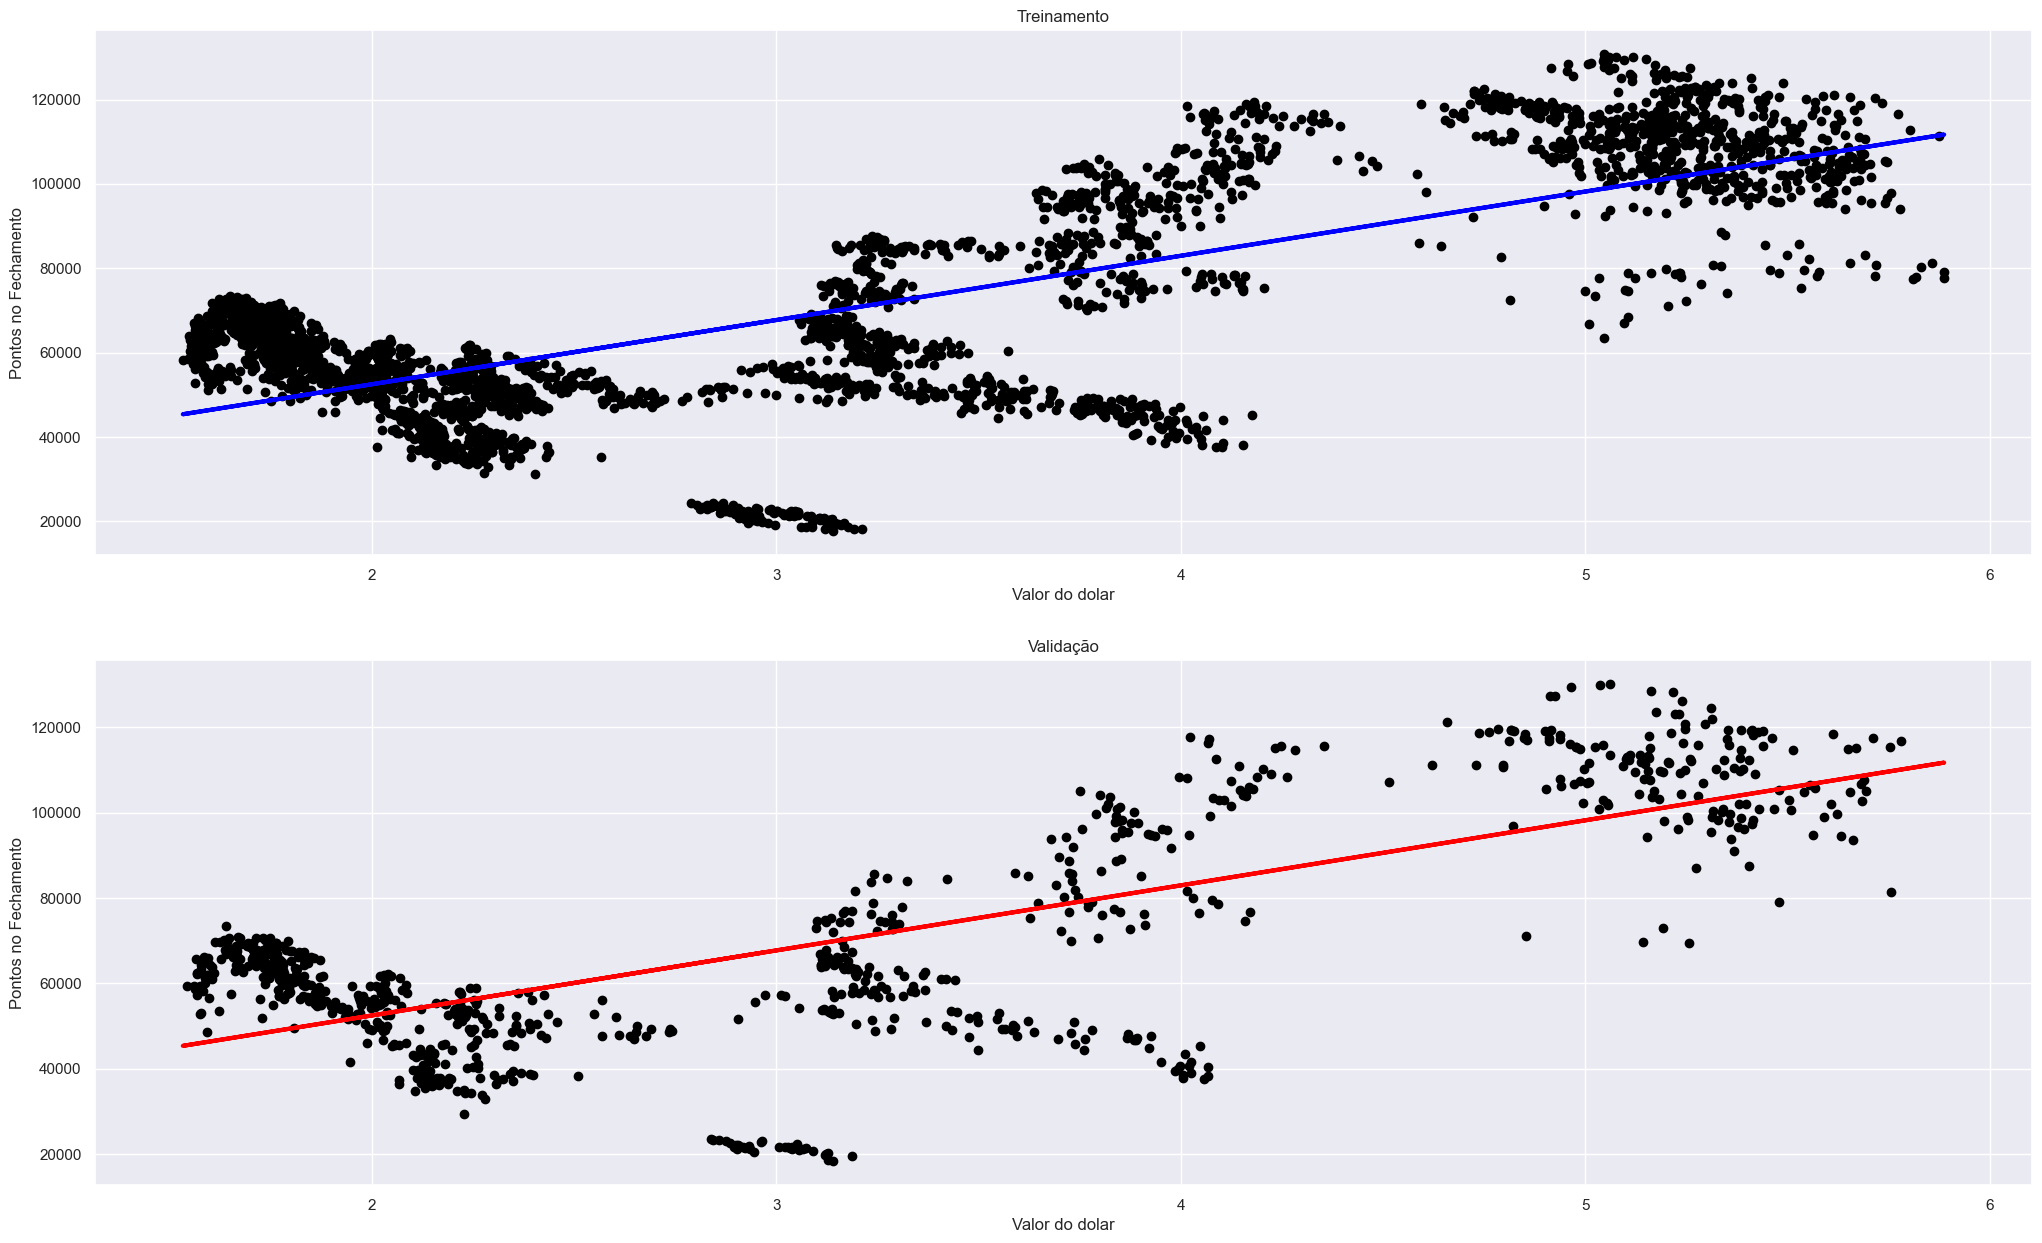

In [23]:
ret = reg_linear(df_ibov_dolar[['DOLAR']].to_numpy(), df_ibov_dolar[['IBOV']].to_numpy())

Como vimos, para um tempo muito grande, a resposta é pouco signficativa, devido a aulta dispersão do dados.

#### Regressão Linear para pedaços do DataFrame

Iremos pegar duas amostras menores de tempo e avaliarmos se conseguimos ter melhores respostas para menores periodos de tempo. Com isso iremos:
* Separar em dois conjuntos;
* Separar os dados de treinamento;
* Dados de validação;
* Aplicar o metodo;
* Validar saida;


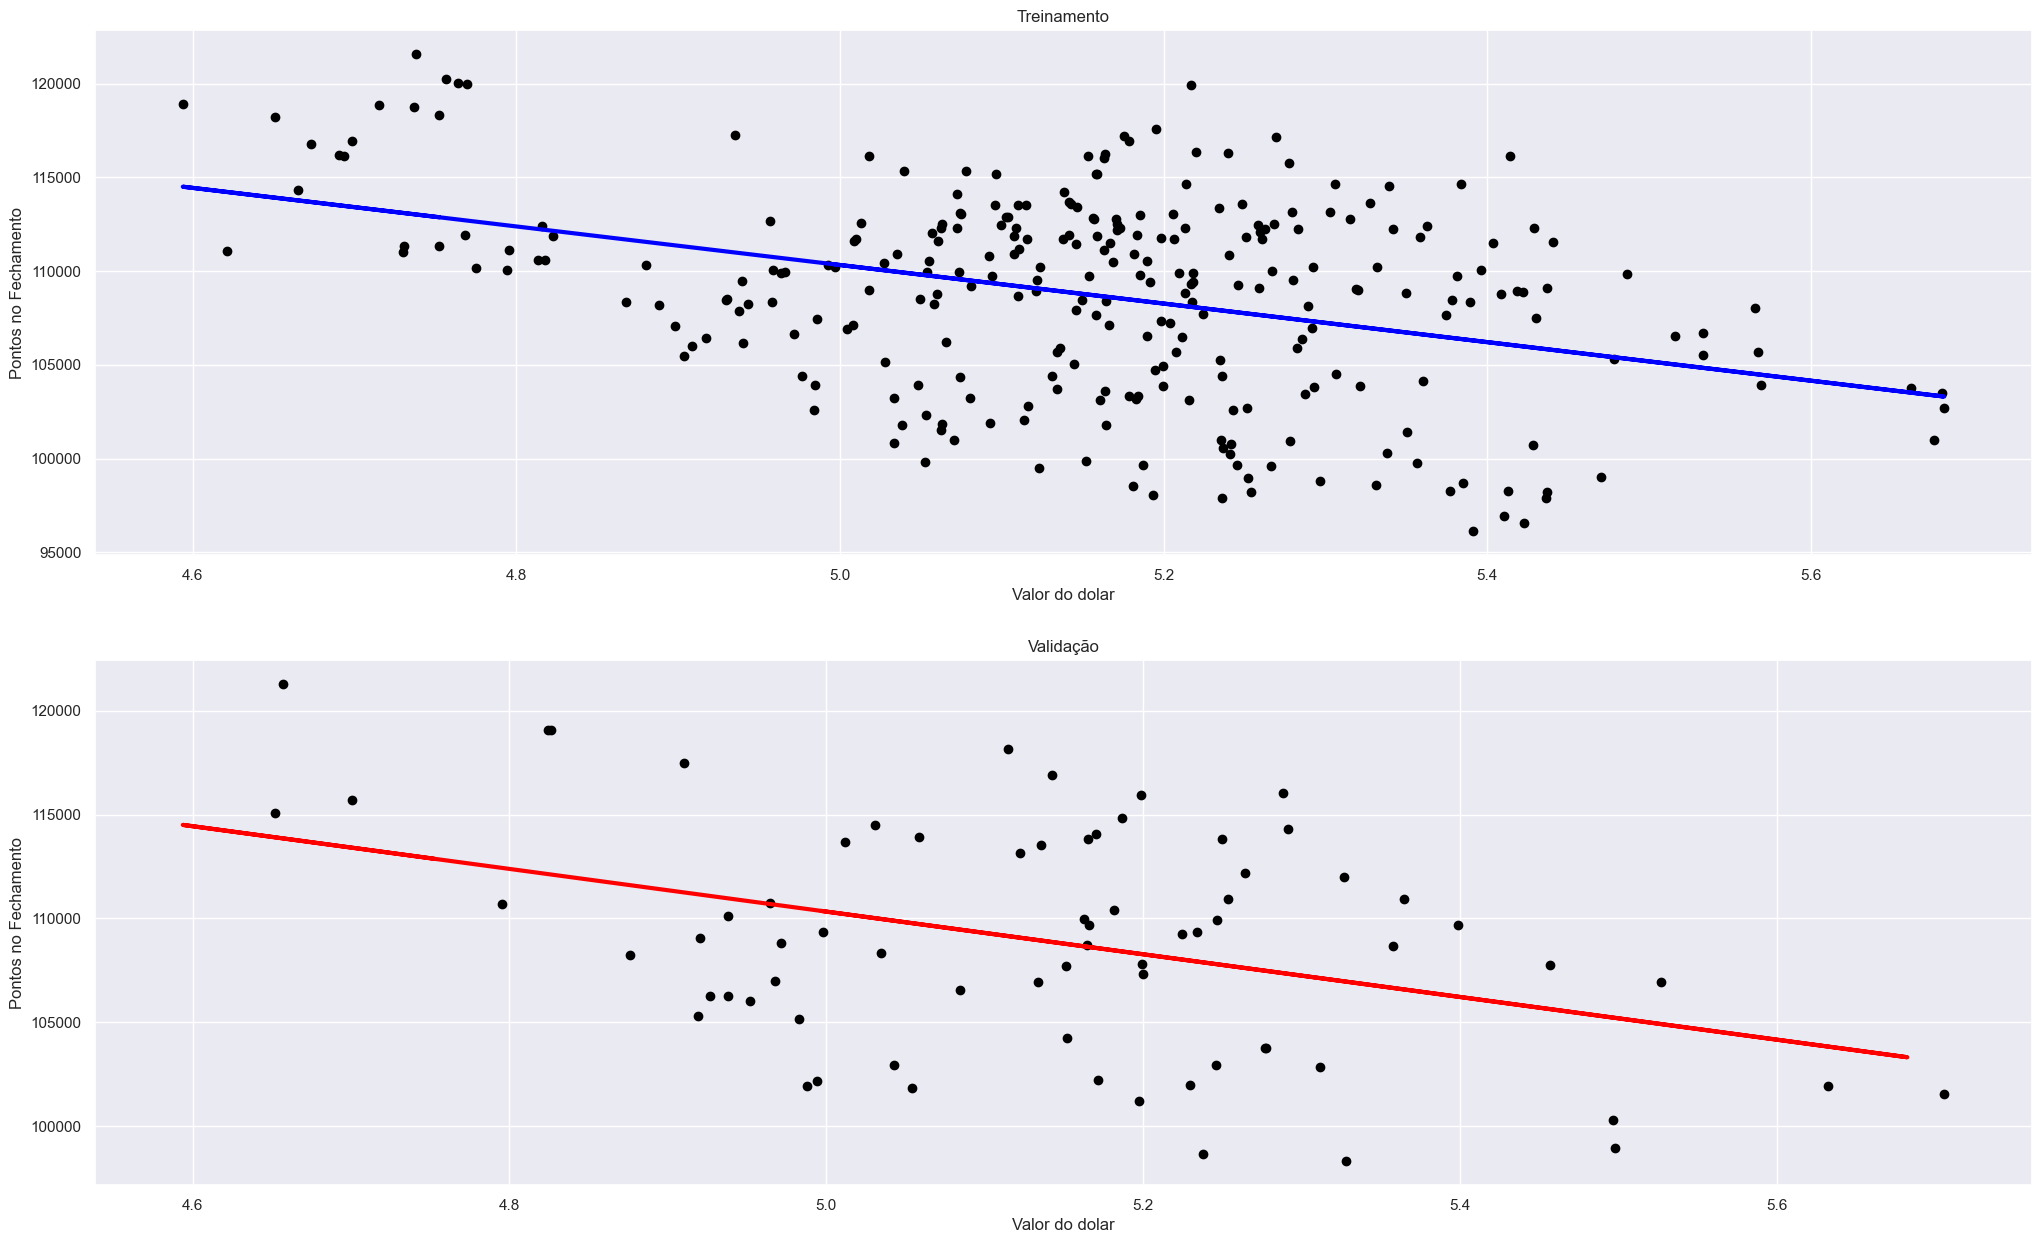

In [24]:
new_df = df_ibov_dolar.loc['2022-01-03':'2023-06-05']

ret = reg_linear(new_df[['DOLAR']].to_numpy(), new_df[['IBOV']].to_numpy())

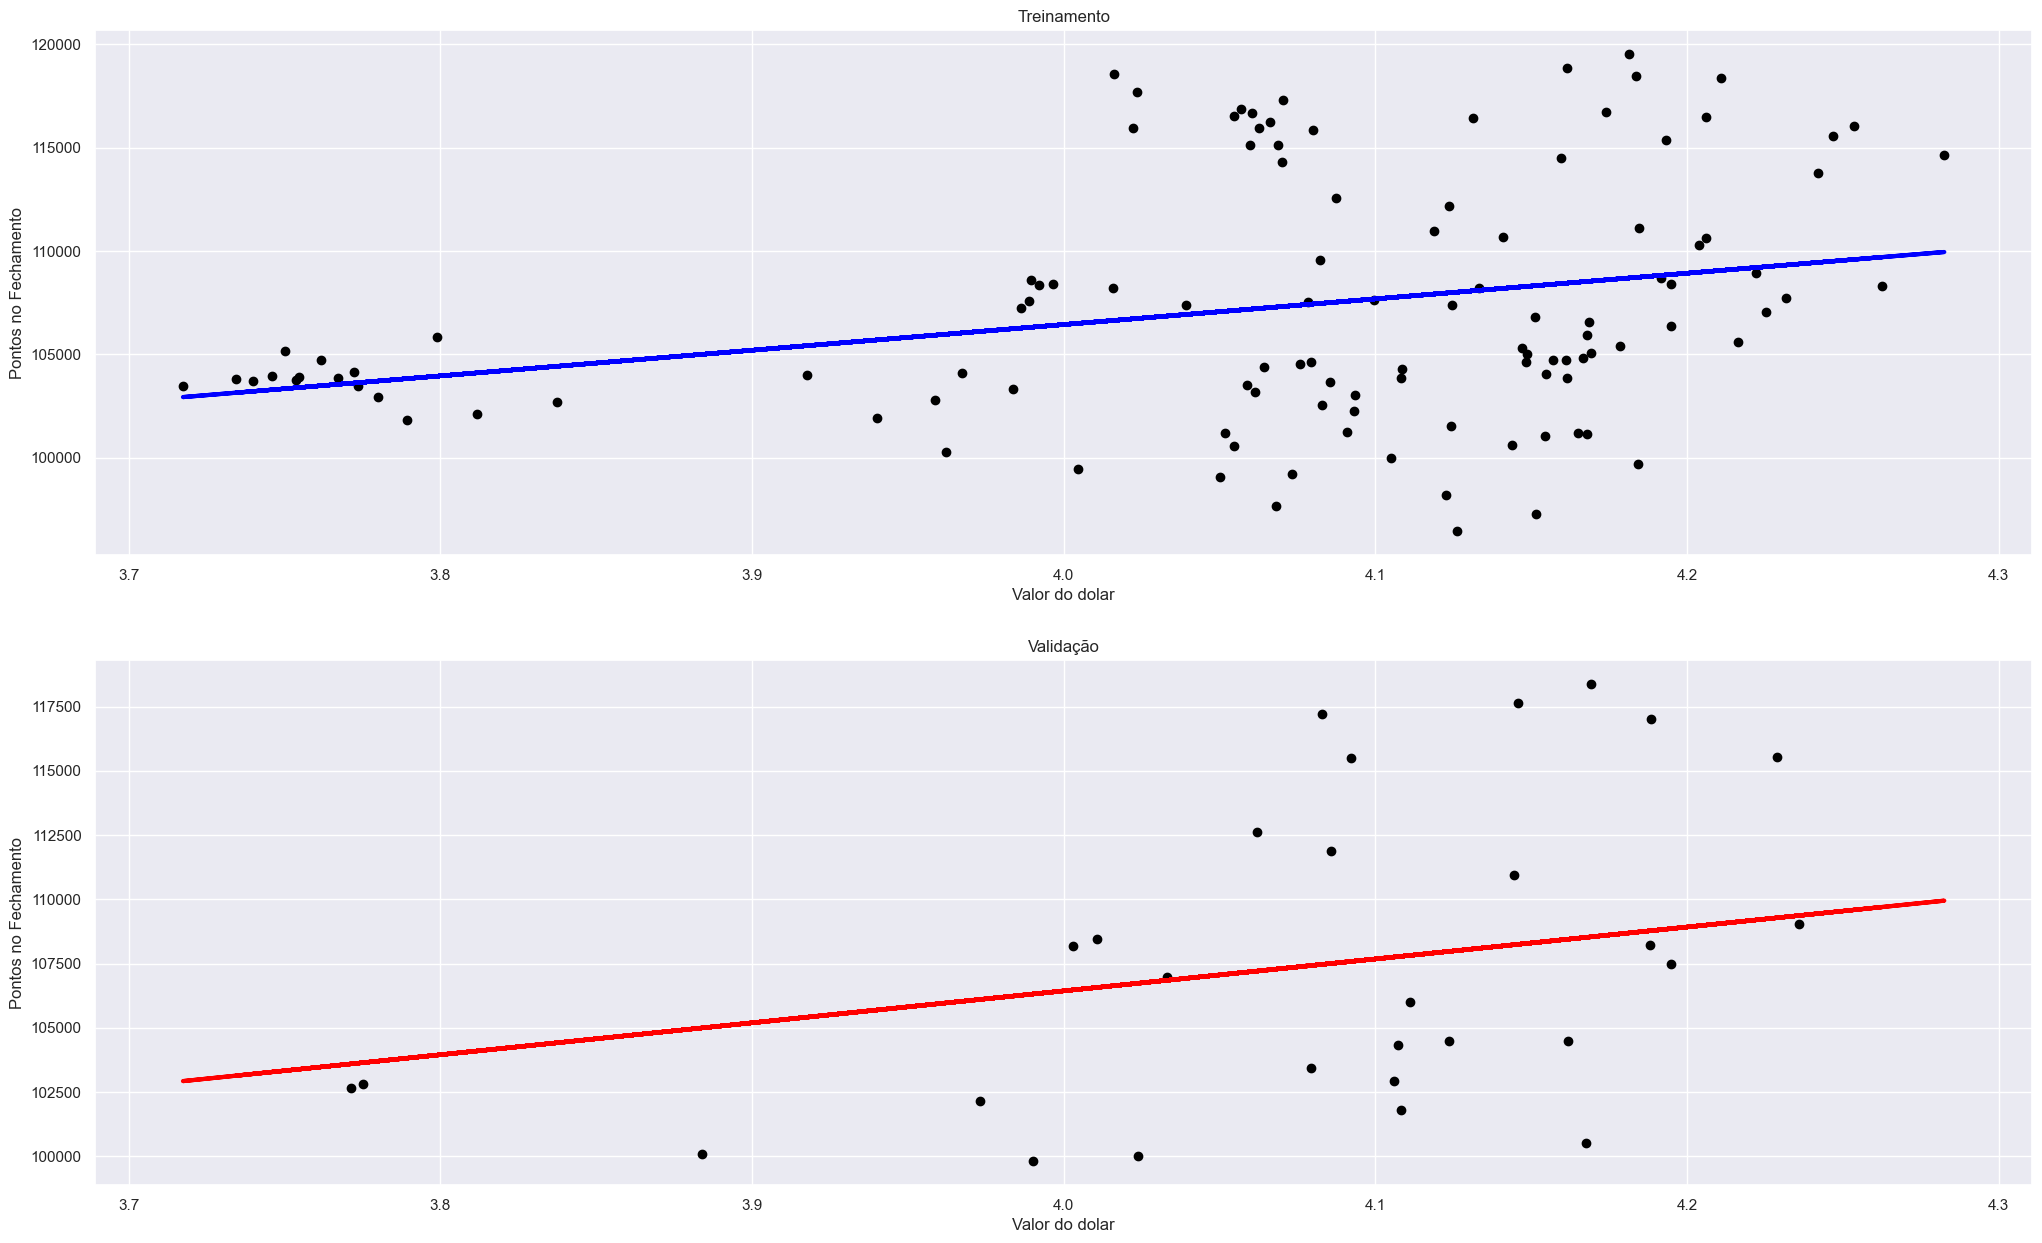

In [27]:
new_df = df_ibov_dolar.loc['2019-07-10':'2020-02-05']

ret = reg_linear(new_df[['DOLAR']].to_numpy(), new_df[['IBOV']].to_numpy())


## Regressão linear Multipla

Agora iremos ver a relação entre bolsas estrangeiras sobre a bolsa do Brasil (Ibovespa). Para isso iremos importar os dados da NASDAQ e do Dow Jones.

In [32]:
nasdaq = yf.Ticker('^IXIC')
dow_jones = yf.Ticker('^DJI')

ibov_hist = ibov.history(period='max')


In [29]:
nasdaq_hist = nasdaq.history(period='max')
display('Serie historica da Nasdaq')
nasdaq_hist

'Serie historica da Nasdaq'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-02 00:00:00-04:00,13217.980469,13364.030273,13204.080078,13307.769531,4554700000,0.0,0.0
2023-10-03 00:00:00-04:00,13229.679688,13280.040039,13008.599609,13059.469727,4684310000,0.0,0.0
2023-10-04 00:00:00-04:00,13092.919922,13258.759766,13072.509766,13236.009766,4308070000,0.0,0.0


In [30]:
dow_jones_hist = dow_jones.history(period='max')
display('Serie historica do Dow Jones')
dow_jones_hist

'Serie historica do Dow Jones'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-01-02 00:00:00-05:00,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0.0,0.0
1992-01-03 00:00:00-05:00,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0.0,0.0
1992-01-06 00:00:00-05:00,3201.500000,3213.330078,3191.860107,3200.100098,27280000,0.0,0.0
1992-01-07 00:00:00-05:00,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0.0,0.0
1992-01-08 00:00:00-05:00,3204.800049,3229.199951,3185.820068,3203.899902,29040000,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-02 00:00:00-04:00,33455.500000,33511.910156,33219.558594,33433.351562,275630000,0.0,0.0
2023-10-03 00:00:00-04:00,33318.839844,33398.539062,32916.199219,33002.378906,293450000,0.0,0.0
2023-10-04 00:00:00-04:00,33034.179688,33156.449219,32873.230469,33129.550781,287030000,0.0,0.0


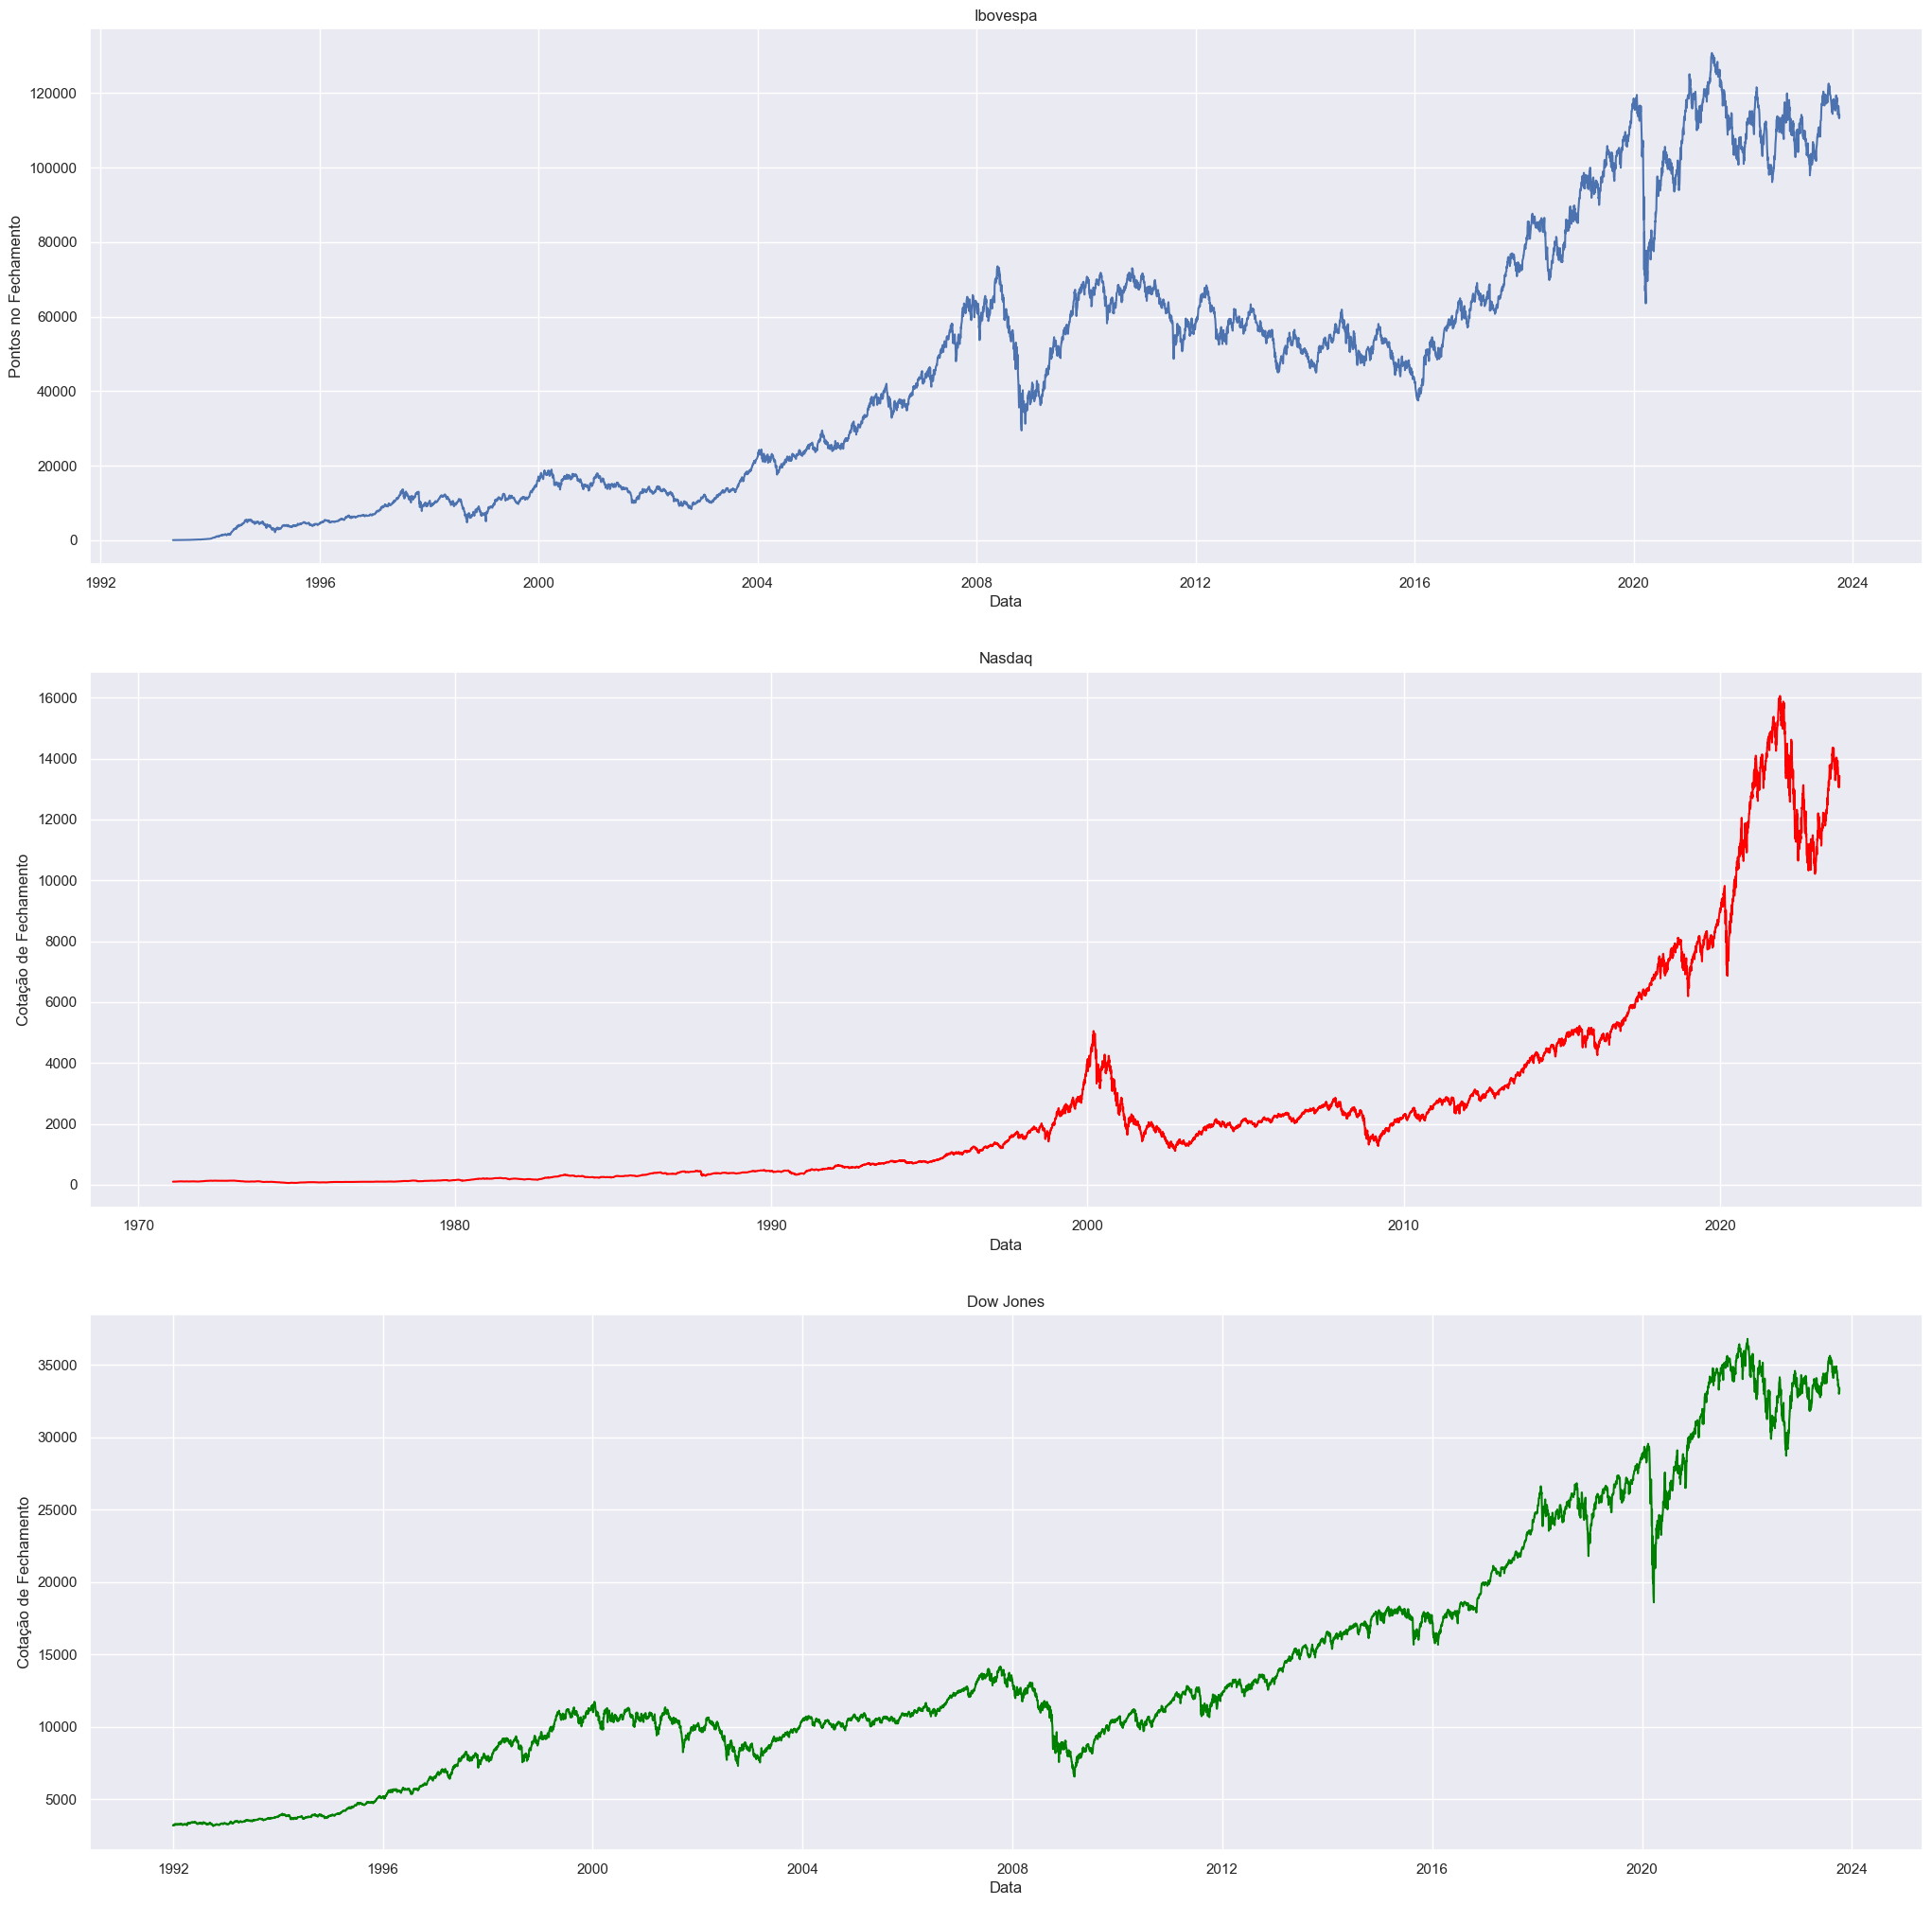

In [33]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
plt.title('Ibovespa')
plt.xlabel('Data')
plt.ylabel('Pontos no Fechamento')
plt.plot(ibov_hist['Close'], label='IBOV')

plt.subplot(3, 1, 2)
plt.title('Nasdaq')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(nasdaq_hist['Close'], color='red')

plt.subplot(3, 1, 3)
plt.title('Dow Jones')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(dow_jones_hist['Close'], color='green')

In [39]:
import pandas as pd

nasdaq_hist = nasdaq.history(period='max')
dow_jones_hist = dow_jones.history(period='max')
ibov_hist = ibov.history(period='max')

ibov_hist.index = ibov_hist.index.strftime('%Y-%m-%d')
ibov_hist = ibov_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
nasdaq_hist.index = nasdaq_hist.index.strftime('%Y-%m-%d')
nasdaq_hist = nasdaq_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
dow_jones_hist.index = dow_jones_hist.index.strftime('%Y-%m-%d')
dow_jones_hist = dow_jones_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

df_temp = pd.merge(ibov_hist, nasdaq_hist, left_index=True, right_index=True)

df_mult = pd.merge(df_temp, dow_jones_hist, left_index=True, right_index=True)
df_mult.columns =['IBOV', 'NASDAQ', 'DOW_JONES']

df_mult

,IBOV,NASDAQ,DOW_JONES
Date,,,
1993-04-27,24.500000,652.520020,3415.929932
1993-04-28,24.299999,658.159973,3413.500000
1993-04-29,23.700001,658.450012,3425.120117
1993-04-30,24.100000,661.419983,3427.550049
1993-05-03,24.100000,666.710022,3446.459961
...,...,...,...
2023-10-02,115057.000000,13307.769531,33433.351562
2023-10-03,113419.000000,13059.469727,33002.378906
2023-10-04,113607.000000,13236.009766,33129.550781


<Axes: >

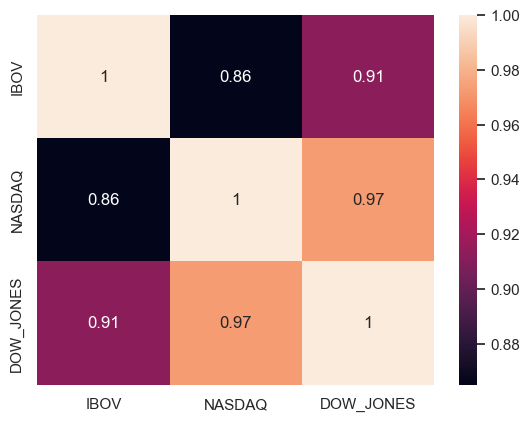

In [40]:
sns.heatmap(df_mult.corr(), annot=True)